# Fit Ramsey

In this notebook we analyse data from a Ramsey experiment. Using the method and data from:

Watson, T. F., Philips, S. G. J., Kawakami, E., Ward, D. R., Scarlino, P., Veldhorst, M., … Vandersypen, L. M. K. (2018). A programmable two-qubit quantum processor in silicon. Nature, 555(7698), 633–637. https://doi.org/10.1038/nature25766

The Ramsey experiment can be used to callibrate the resonance of the vector source to the resonance frequency of the qubit. The free evolution time between two pi-pulses is varied and in this particular example oscillations (angular freq 4MHz) were added artificially to improve the fit of the decay by making the phase of the last microwafe pulse dependent on the free evolution time. The difference between the fitted frequency and the frequency of the artificially oscillations is the difference between the frequency of the vector source and the resonance frequency of the qubit.

Loading packages:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from qtt.algorithms.functions import gauss_ramsey, fit_gauss_ramsey

Test data, based on the data acquired by Watson et all.

In [4]:
y_data = np.array([0.6019, 0.5242, 0.3619, 0.1888, 0.1969, 0.3461, 0.5276, 0.5361,
       0.4261, 0.28  , 0.2323, 0.2992, 0.4373, 0.4803, 0.4438, 0.3392,
       0.3061, 0.3161, 0.3976, 0.4246, 0.398 , 0.3757, 0.3615, 0.3723,
       0.3803, 0.3873, 0.3873, 0.3561, 0.37  , 0.3819, 0.3834, 0.3838,
       0.37  , 0.383 , 0.3573, 0.3869, 0.3838, 0.3792, 0.3757, 0.3815])

x_data = np.array([i*1.6/40 for i in range(40)])

Plotting the data:

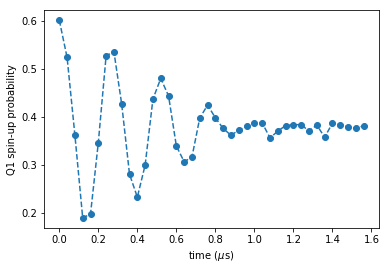

In [6]:
plt.figure()
plt.plot(x_data,y_data, '--o', label='fraction')
plt.xlabel(r'time ($\mu$s)')
plt.ylabel('Q1 spin-up probability')
plt.show()

Applying the `fit_gauss_ramsey` function to fit the data:

In [8]:
par_fit_test,_ = fit_gauss_ramsey(x_data*1e-6,y_data)
freq_fit=abs(par_fit_test[2]*1e-6)
test_x = np.linspace(0,1.6e-6,200)

Plotting the data and the fit:

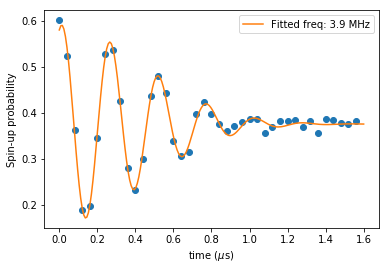

In [11]:
plt.figure()
plt.plot(x_data,y_data, 'o')
plt.plot(test_x*1.0e6,gauss_ramsey(test_x,par_fit_test), label='Fitted freq: %.1f MHz' % freq_fit)
plt.xlabel(r'time ($\mu$s)')
plt.ylabel('Spin-up probability')
plt.legend()
plt.show()